# Quickstart

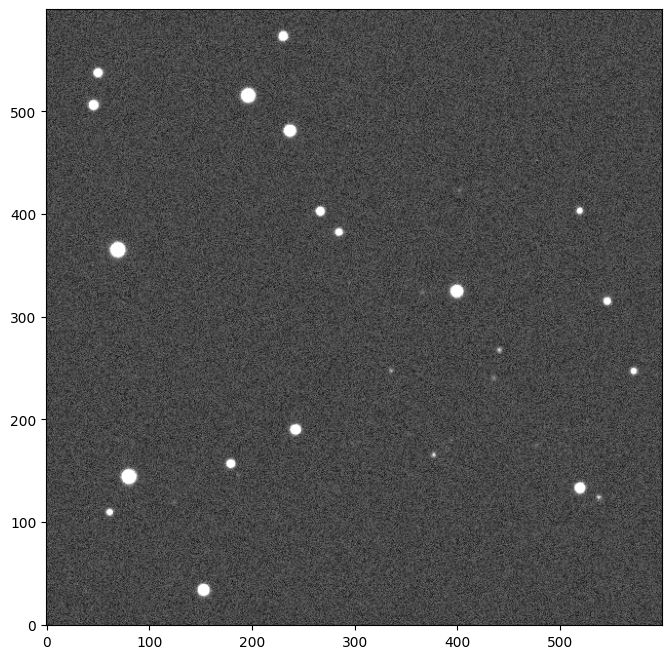

In [3]:
from prose import Sequence, blocks, example_image
import matplotlib.pyplot as plt

# getting the example image
image = example_image()
image.show()

we can now build a [Sequence](prose.Sequence) containing single processing unit called [Block](prose.Block) that will sequentially process our image 

100%|██████████| 1/1 [00:00<00:00,  2.92images/s]


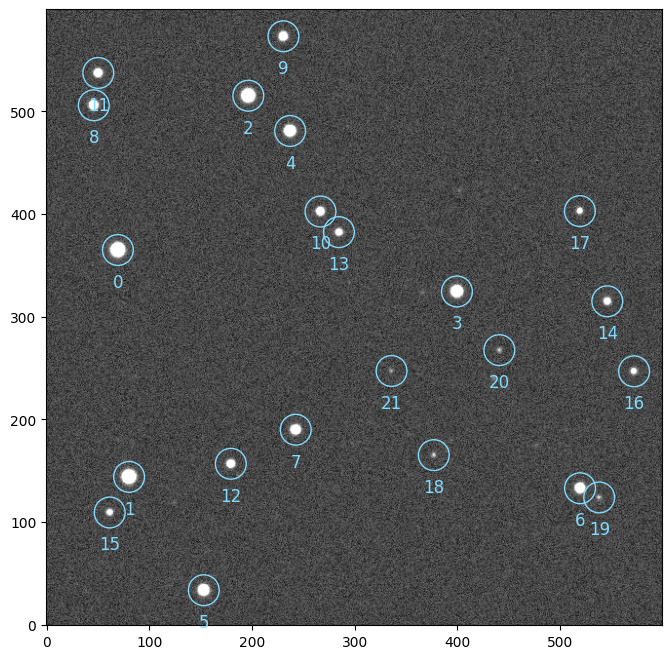

In [4]:
sequence = Sequence([
    blocks.detection.PointSourceDetection(),  # stars detection
    blocks.Cutouts(21),  # cutouts extraction
    blocks.MedianEPSF(),       # PSF building
    blocks.JAXMoffat2D(),        # PSF modeling
])

sequence.run([image])

# plotting the detected stars
image.show()
image.sources.plot()

prose contains a wide variety of blocks implementing methods and algorithms commonly used in astronomical image processing.

Let's plot the results from [Image](prose.Image) attributes

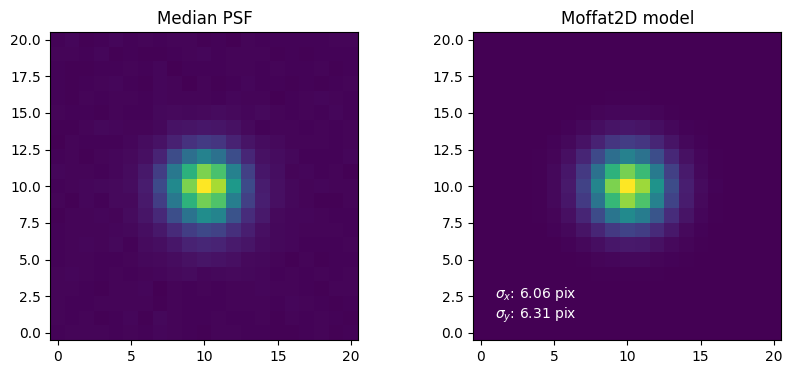

In [5]:
params = image.epsf.params
model = image.epsf.model

# plotting
# --------
plt.figure(None, (10, 4))

plt.subplot(1, 2, 1, title="Median PSF")
plt.imshow(image.epsf.data, origin="lower")

plt.subplot(1, 2, 2, title=f"Moffat2D model")
plt.imshow(model(params), origin="lower")
_ = plt.text(1, 1, f"$\sigma_x$: {params['sigma_x']:.2f} pix\n$\sigma_y$: {params['sigma_y']:.2f} pix", c="w")